# Loading the dataset and intial exploration


In [26]:
import pandas as pd

# Load dataset
df = pd.read_csv('youtube_comments.csv')  # Replace with your file path




In [33]:
# Display basic info
print(f"Dataset Shape: {df.shape}")
print(f"Columns in your dataframe: {df.columns}")
print(f"Sentiment Distribution:\n{df['Sentiment'].value_counts()}") ###contains (positive, negative, neutral)
print(df.sample(3))  # Preview random rows

Dataset Shape: (18408, 5)
Columns in your dataframe: Index(['Comment', 'Sentiment', 'cleaned_comment', 'vader_score',
       'vader_sentiment'],
      dtype='object')
Sentiment Distribution:
Sentiment
positive    11432
neutral      4638
negative     2338
Name: count, dtype: int64
                                                 Comment Sentiment  \
8196   if you got any new shoes for school comment wh...   neutral   
10908  i love how two male lions express their love a...  positive   
4559   i recently finished watching the queens gambit...  positive   

                                         cleaned_comment  vader_score  \
8196   got new shoe school comment got im trying see ...       0.0000   
10908          love two male lion express love frienship       0.8555   
4559   recently finished watching queen gambit netfli...       0.6705   

      vader_sentiment  
8196         negative  
10908        positive  
4559         positive  


# importing necessary libraries for text cleaning

In [29]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the necessary resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab resource

# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Lowercase
        text = text.lower()
        # Remove punctuation/numbers
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        # Tokenize
        tokens = nltk.word_tokenize(text)
        # Remove stopwords
        tokens = [word for word in tokens if word not in stop_words]
        # Lemmatize
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return ' '.join(tokens)
    else:
        # Handle non-string values (e.g., return empty string or NaN)
        return ''  # Or you could use: return float('nan')

comment_column = 'Comment'
# Apply preprocessing using the determined comment column
df['cleaned_comment'] = df[comment_column].apply(preprocess_text)
print(df[['Comment', 'cleaned_comment']].head()) # Update this line if your original comment column has a different name

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                             Comment  \
0  lets not forget that apple pay in 2014 require...   
1  here in nz 50 of retailers don’t even have con...   
2  i will forever acknowledge this channel with t...   
3  whenever i go to a place that doesn’t take app...   
4  apple pay is so convenient secure and easy to ...   

                                     cleaned_comment  
0  let forget apple pay required brand new iphone...  
1  nz retailer dont even contactless credit card ...  
2  forever acknowledge channel help lesson idea e...  
3  whenever go place doesnt take apple pay doesnt...  
4  apple pay convenient secure easy use used kore...  


# Data exploration and visualization

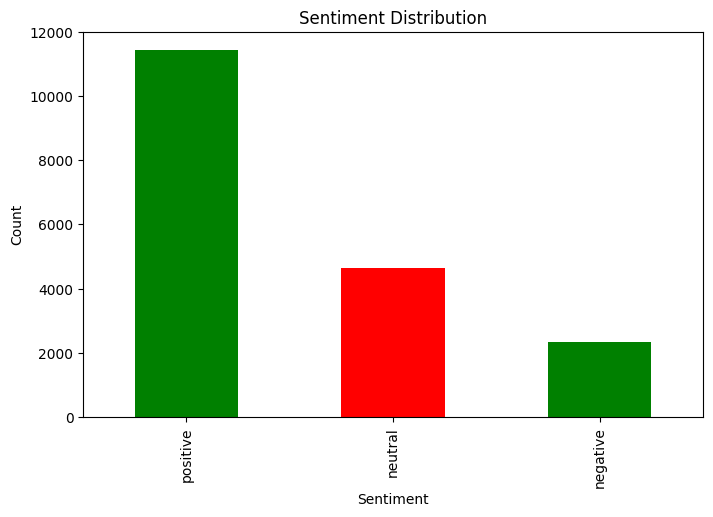

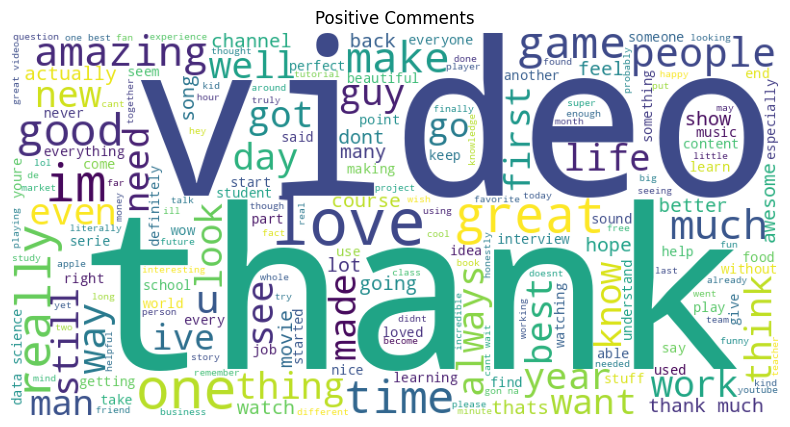

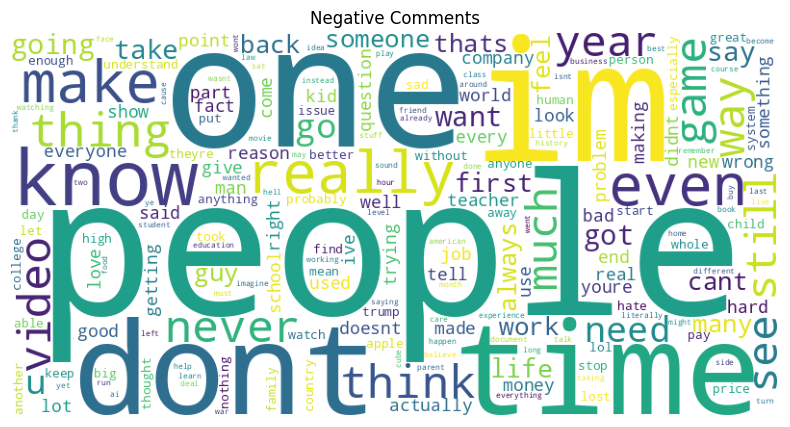

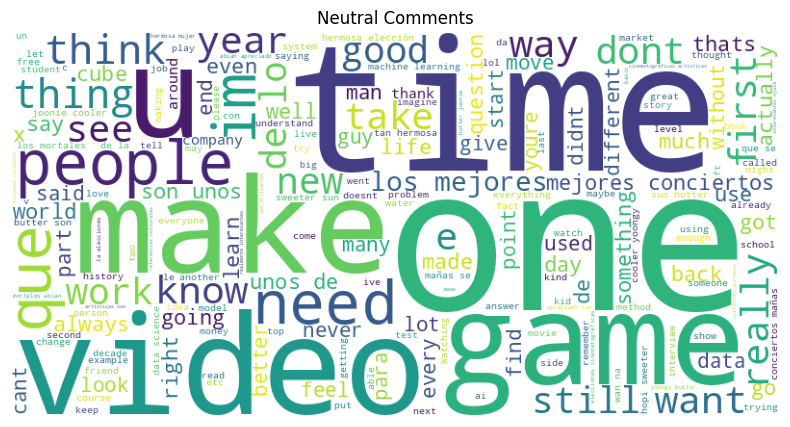

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sentiment distribution
plt.figure(figsize=(8, 5))
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Word clouds
def generate_wordcloud(texts, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(texts))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_wordcloud(df[df['Sentiment'] == 'positive']['cleaned_comment'], 'Positive Comments')
generate_wordcloud(df[df['Sentiment'] == 'negative']['cleaned_comment'], 'Negative Comments')
generate_wordcloud(df[df['Sentiment'] == 'neutral']['cleaned_comment'], 'Neutral Comments')


**VADER Sentiment Analysis is widely used due to its specialized design for social media and informal text**

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Predict sentiment
df['vader_score'] = df['cleaned_comment'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['vader_sentiment'] = df['vader_score'].apply(lambda x: 'positive' if x >= 0.05 else 'negative')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Modeling and testing

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Prepare data
X = df['cleaned_comment']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.60      0.41      0.49       475
     neutral       0.60      0.60      0.60       937
    positive       0.82      0.88      0.85      2270

    accuracy                           0.75      3682
   macro avg       0.67      0.63      0.65      3682
weighted avg       0.74      0.75      0.74      3682

[[ 195  144  136]
 [  81  561  295]
 [  50  225 1995]]


**checking with LR for more accuracy**



In [25]:
logistic regression

from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
logreg_model = LogisticRegression(max_iter=1000) # Increased max_iter
logreg_model.fit(X_train_tfidf, y_train)
y_pred_logreg = logreg_model.predict(X_test_tfidf)

# Evaluate Logistic Regression
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))


###but gives the same accuracy so SVM is the best

Logistic Regression Results:
              precision    recall  f1-score   support

    negative       0.64      0.34      0.44       475
     neutral       0.62      0.56      0.59       937
    positive       0.80      0.91      0.85      2270

    accuracy                           0.75      3682
   macro avg       0.69      0.60      0.63      3682
weighted avg       0.73      0.75      0.73      3682

[[ 161  145  169]
 [  61  528  348]
 [  29  183 2058]]


# Sentiment comparison

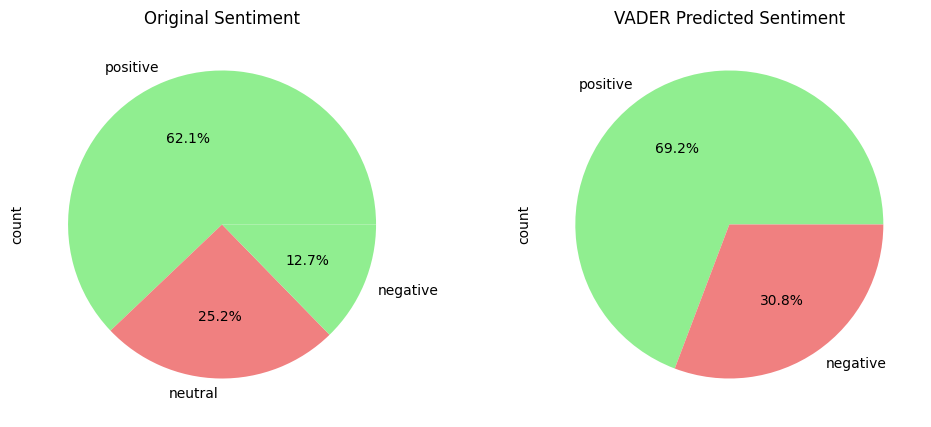

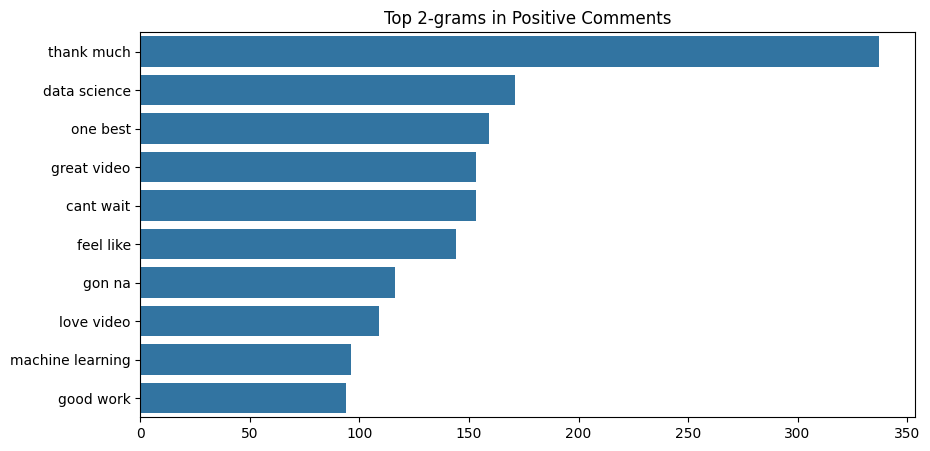

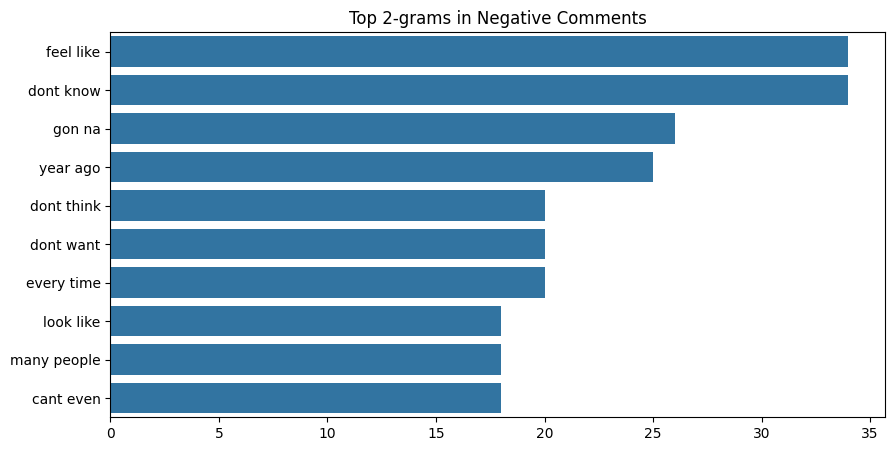

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# Sentiment distribution comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Original Sentiment')

plt.subplot(1, 2, 2)
df['vader_sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('VADER Predicted Sentiment')
plt.show()

# Top n-grams
def plot_top_ngrams(texts, sentiment, n=2, top_k=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_k]

    plt.figure(figsize=(10, 5))
    sns.barplot(x=[wf[1] for wf in words_freq], y=[wf[0] for wf in words_freq])
    plt.title(f'Top {n}-grams in {sentiment} Comments')
    plt.show()

plot_top_ngrams(df[df['Sentiment'] == 'positive']['cleaned_comment'], 'Positive', n=2)
plot_top_ngrams(df[df['Sentiment'] == 'negative']['cleaned_comment'], 'Negative', n=2)


Prediction

In [39]:


# Predicting using the trained SVM model
def predict_sentiment(comment):
    cleaned_comment = preprocess_text(comment)
    comment_tfidf = vectorizer.transform([cleaned_comment])
    prediction = svm_model.predict(comment_tfidf)[0]
    return prediction

# Example usage:
new_comment = ""  # Blank string for pasting
print("Paste your comment here:")
new_comment = input() # Get input from the user
predicted_sentiment = predict_sentiment(new_comment)
print(f"Predicted sentiment for '{new_comment}': {predicted_sentiment}")


Paste your comment here:
you are  awesome
Predicted sentiment for 'you are  awesome': positive


In [ ]:
# prompt: predict and a blank should appear for pasting a comment

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# ... (rest of your existing code)

# Prediction
def predict_sentiment(comment):
    cleaned_comment = preprocess_text(comment)
    comment_tfidf = vectorizer.transform([cleaned_comment])
    prediction = svm_model.predict(comment_tfidf)[0]
    return prediction

# Example usage with a blank for pasting:
new_comment = ""  # Blank string for pasting
print("Paste your comment here:")
new_comment = input() # Get input from the user
predicted_sentiment = predict_sentiment(new_comment)
print(f"Predicted sentiment for '{new_comment}': {predicted_sentiment}")
